In [1]:
# Project 4

In [83]:
from sympy import *
from IPython.display import Math

$$R_x = sin( \theta)* cos( \phi) $$
$$R_y = sin( \theta)*sin( \phi) $$
$$R_z = cos( \theta) $$

In [84]:
# Just to make it look pretty
latexReplaceRules = {
    # r'{\left(t \right)}':r' ',
    r'\frac{d}{d t}':r'\dot',
    r'\frac{d^{2}}{d t^{2}}':r'\ddot',
}
def latexNew(expr,**kwargs):
    retStr = latex(expr,**kwargs)
    for _,__ in latexReplaceRules.items():
        retStr = retStr.replace(_,__)
    return retStr
init_printing(latex_printer=latexNew)

# Declare symbolic variables R, g, m and t:
R = Symbol('R')
m = Symbol('m')
g = Symbol('g')

# Declare symbolic functions for theta and phi:
theta = Function('theta')(t)
phi = Function('phi')(t)

# Complete the R vector by writing out the rest of its components
Rx = R*sin(theta)*cos(phi)
Ry = R*sin(theta)*sin(phi)
Rz = R*cos(theta)

# finding Energies
V_squared = simplify(diff(Rx,t)**2 + diff(Ry,t)**2 + diff(Rz,t)**2)

T =  m*V_squared/2  # kinetic energy
V =  -m*g*R*cos(theta)  # potential energy
L = T-V
L

To find the equations of motion for $\theta$ and $\phi$, we use:

$$ \frac{d}{dt} (\frac{\partial L}{\partial \dot{\theta}})-\frac{\partial L}{\partial \theta} = 0 $$

$$ \frac{d}{dt} (\frac{\partial L}{\partial \dot{\phi}})-\frac{\partial L}{\partial \phi} = 0 $$

In our Lagrangian, 
$$ \frac{\partial L}{\partial \phi} = 0 $$
So,
$$\frac{\partial L}{\partial \dot{\phi}} = constant = l_z $$

In [ ]:
# finding conserved quantities

In [85]:
# find partial derivative of L with respect to phi_prime:
l_z = diff(L,diff(phi,t))
l_z


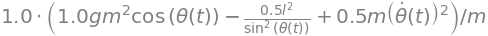

In [53]:
# for theta, we can substitute in our conserved quantity 
l = Symbol('l')
L = -g*m*cos(theta) + (l**2)/(2*m*sin(theta)**2) + (1/2)*diff(theta,t)**2
diff((diff(L,(diff(theta,t)))),t)-diff(L,theta)
'''
when we multiply through by theta_dot, we realize a second conserved quantity - energy
'''
E = integrate(diff(theta,t)*(diff((diff(L,(diff(theta,t)))),t)-diff(L,theta)),t)
E

In [ ]:
# finding fixed points 

We found the equation of motion for $\theta$ to be:

$$ \ddot{\theta} + gsin(\theta) - R^2 \dot{\phi}^2 sin(\theta)cos(\theta) = 0 $$

At stationary points, all derivatives of $\theta$ are 0. 
So,

$$ sin(\theta)(g - R^2 \dot{\phi} ^2 cos(\theta)) = 0 $$

Hence,

$$ sin(\theta) = 0 $$

We have one fixed point at 0. About this fixed point, $cos(\theta)$ is approximately 1.

In [75]:
# small oscillations about the fixed points
'''
we can perform a taylor expansion of our sin function about the fixed point and substitute it into our equation of motion
'''
x = Symbol("x")
sin_exp=(sin(x).series(x,0,3))
display(Math(latex(sin_exp)))

<IPython.core.display.Math object>

Substituting into our equation of motion, we obtain:

$$ \ddot{\theta} + g\theta - R^2\dot{\phi}^2\theta = 0 $$

$$ \ddot{\theta} + (g - R^2\dot{\phi}^2)\theta = 0 $$

The solution to this differential equation is a sum of sines and cosines:

$$ \theta(t) = cos(t\sqrt{g-R^2\omega^2})+ sin(t\sqrt{g-R^2\omega^2}) $$